In [73]:
import pandas as pd
import numpy as np

In [74]:
import matplotlib.pyplot as plt

In [75]:
Plant_1_Generation_Data = pd.read_csv("Plant_1_Generation_Data.csv", sep=',')

In [76]:
Plant_1_Weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", sep=',')

In [77]:
Plant_2_Generation_Data = pd.read_csv("Plant_2_Generation_Data.csv", sep=',')

In [78]:
Plant_2_Weather = pd.read_csv("Plant_2_Weather_Sensor_Data.csv", sep=',')

# GENERAL EXPLORATION

In [79]:
Plant_1_Generation_Data.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [125]:
Plant_2_Generation_Data.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [80]:
Plant_1_Generation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [126]:
Plant_2_Generation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [81]:
Plant_1_Generation_Data.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [129]:
Plant_2_Generation_Data.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [127]:
print(Plant_1_Generation_Data['SOURCE_KEY'].value_counts())

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64


In [128]:
print(Plant_2_Generation_Data['SOURCE_KEY'].value_counts())

SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64


In [112]:
Total_ac_P1 = Plant_1_Generation_Data.groupby(['SOURCE_KEY'])['AC_POWER'].sum().reset_index()
Total_ac_P2 = Plant_2_Generation_Data.groupby(['SOURCE_KEY'])['AC_POWER'].sum().reset_index()

In [113]:
Total_dc_P1 = Plant_1_Generation_Data.groupby(['SOURCE_KEY'])['DC_POWER'].sum().reset_index()
Total_dc_P2 = Plant_2_Generation_Data.groupby(['SOURCE_KEY'])['DC_POWER'].sum().reset_index()

In [115]:
Total_dcac_P1 = pd.merge(Total_dc_P1,Total_ac_P1, on=['SOURCE_KEY'], how='inner')
Total_dcac_P2 = pd.merge(Total_dc_P2,Total_ac_P2, on=['SOURCE_KEY'], how='inner')

In [116]:
Total_dcac_P1['AC/DC'] = (Total_ac_P1['AC_POWER'] / Total_dc_P1['DC_POWER'])*100
Total_dcac_P2['AC/DC'] = (Total_ac_P2['AC_POWER'] / Total_dc_P2['DC_POWER'])*100

In [134]:
print(f"Efficency of inverters in Plant1:\n {Total_dcac_P1}")

Efficency of inverters in Plant1:
          SOURCE_KEY      DC_POWER       AC_POWER     AC/DC
0   1BY6WEcLGh8j5v7  9.063716e+06  886665.326069  9.782581
1   1IF53ai7Xc0U56Y  1.006294e+07  984007.153452  9.778521
2   3PZuoBAID5Wc2HD  1.004313e+07  982068.208928  9.778510
3   7JYdWkrLSPkdwr4  9.815350e+06  959906.307338  9.779644
4   McdE0feGgRqW7Ca  1.003212e+07  981080.708217  9.779392
5   VHMLBKoKgIrUVDU  1.005725e+07  983449.000642  9.778507
6   WRmjgnKYAwPKWDb  9.838489e+06  962138.298813  9.779330
7   YxYtjZvoooNbGkE  9.869145e+06  965127.756186  9.779244
8   ZnxXDlPa8U1GXgE  9.997405e+06  977644.316190  9.778981
9   ZoEaEvLYb1n2sOq  9.803128e+06  958700.484522  9.779537
10  adLQvlD726eNBSB  1.019778e+07  997125.156663  9.777863
11  bvBOhCH3iADSZry  8.925490e+06  873237.550835  9.783638
12  iCRJl6heRkivqQ3  9.987733e+06  976688.499523  9.778880
13  ih0vzX44oOqAx2f  9.695845e+06  948272.430359  9.780193
14  pkci93gMrogZuBj  9.895623e+06  967719.414521  9.779267
15  rGa61gmuvPhdLxV  

In [135]:
print(f"Efficency of inverters in Plant2:\n {Total_dcac_P2}")
#Et9kgGMDl729KT4, Quc1TzYxW2pYoWX, LYwnQax7tkwH5Cb ricevono poca DC in entrata nonostante abbiano un numero di osservazioni alte.
#Mentre mqwcsP2rE7J0TFp, NgDl19wMapZy17u, IQ2d7wF4YD8zU1Q, xMbIugepa2P7lBB il valore è giustificato dal fatto di avere quasi 800 osservazioni in meno

Efficency of inverters in Plant2:
          SOURCE_KEY       DC_POWER       AC_POWER      AC/DC
0   4UPUqMRk7TRMgml  887444.875348  867688.151550  97.773752
1   81aHJ1q11NBPMrL  752165.196310  735648.671081  97.804136
2   9kRcWv60rDACzjR  797324.213511  779819.329933  97.804546
3   Et9kgGMDl729KT4  601396.050982  588615.708104  97.874887
4   IQ2d7wF4YD8zU1Q  672411.639080  657492.579189  97.781261
5   LYwnQax7tkwH5Cb  639696.326687  626022.753183  97.862490
6   LlT2YUhhzqhg5Sw  800062.652611  782521.577770  97.807537
7   Mx2yZCDsyf6DPfv  910617.270808  890317.270321  97.770743
8   NgDl19wMapZy17u  644144.508733  629927.405301  97.792871
9   PeE6FRyGXUgsRhN  810478.778457  792664.868701  97.802051
10  Qf4GUc1pJu5T6c6  890596.324322  870755.655462  97.772204
11  Quc1TzYxW2pYoWX  553548.858901  542014.929794  97.916367
12  V94E5Ben1TlhnDV  854375.668930  835443.639984  97.784110
13  WcxssY2VbP4hApt  799350.243035  781608.549098  97.780486
14  mqwcsP2rE7J0TFp  649276.918105  634944.647197 

__Plant1_1BY6WEcLGh8j5v7_inverter per 15 16 e 17__

In [137]:
# Filtrare le osservazioni basate sul 'SOURCE_KEY'
Plant1_1BY6WEcLGh8j5v7 = Plant_1_Generation_Data[Plant_1_Generation_Data['SOURCE_KEY'] == "1BY6WEcLGh8j5v7"]

In [140]:
Plant1_1BY6WEcLGh8j5v7['DATE_TIME'] = str(Plant1_1BY6WEcLGh8j5v7['DATE_TIME'])

C:\Users\loris\AppData\Local\Temp\ipykernel_2624\3737103798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plant1_1BY6WEcLGh8j5v7['DATE_TIME'] = str(Plant1_1BY6WEcLGh8j5v7['DATE_TIME'])


In [141]:
# Filtrare le osservazioni per la data specifica
Plant1_1BY6WEcLGh8j5v7_1506 = Plant1_1BY6WEcLGh8j5v7[Plant1_1BY6WEcLGh8j5v7['DATE_TIME'].str.contains("15-06-2020")]
Plant1_1BY6WEcLGh8j5v7_1506['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1506['DATE_TIME'], format='%d-%m-%Y %H:%M')

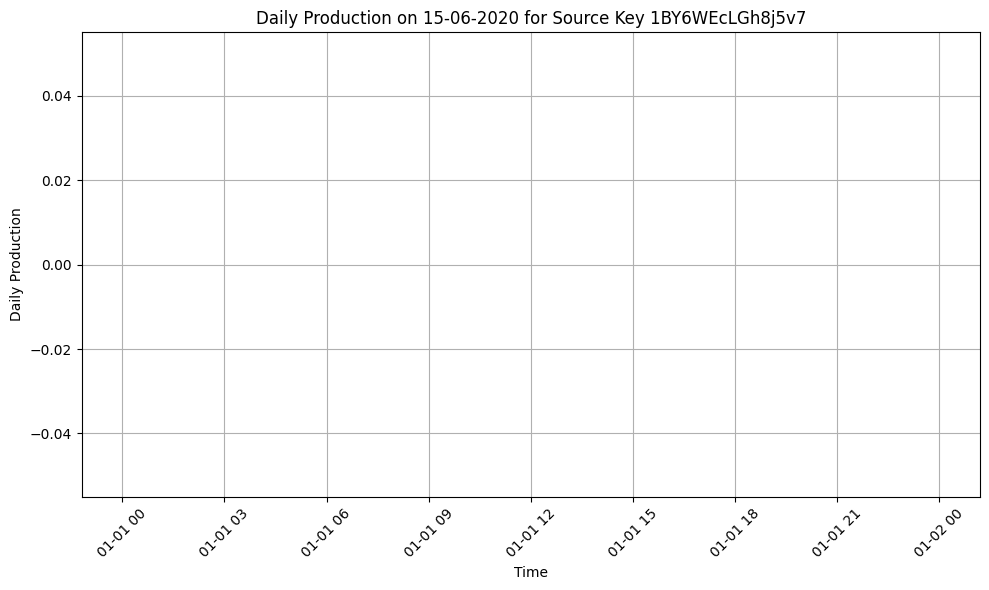

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(Plant1_1BY6WEcLGh8j5v7_1506['DATE_TIME'], Plant1_1BY6WEcLGh8j5v7_1506['DAILY_YIELD'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Daily Production')
plt.title('Daily Production on 15-06-2020 for Source Key 1BY6WEcLGh8j5v7')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [93]:
Plant1_1BY6WEcLGh8j5v7_1606 = Plant1_1BY6WEcLGh8j5v7[Plant1_1BY6WEcLGh8j5v7['DATE_TIME'].str.contains("16-06-2020")]
Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'], format='%d-%m-%Y %H:%M')

C:\Users\loris\AppData\Local\Temp\ipykernel_2624\2368472528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'], format='%d-%m-%Y %H:%M')


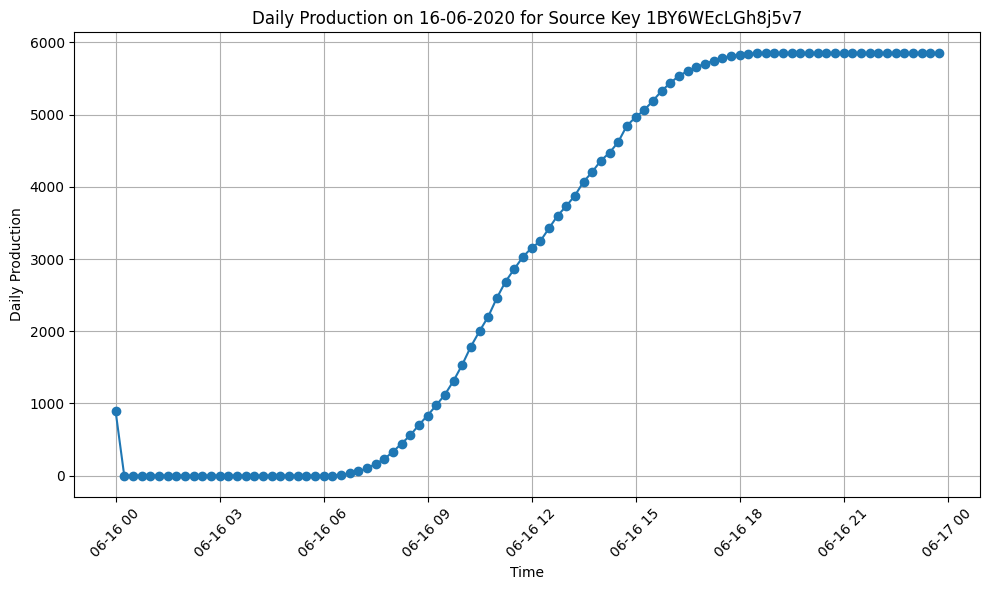

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'], Plant1_1BY6WEcLGh8j5v7_1606['DAILY_YIELD'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Daily Production')
plt.title('Daily Production on 16-06-2020 for Source Key 1BY6WEcLGh8j5v7')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
Plant1_1BY6WEcLGh8j5v7_1706 = Plant1_1BY6WEcLGh8j5v7[Plant1_1BY6WEcLGh8j5v7['DATE_TIME'].str.contains("17-06-2020")]
Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'], format='%d-%m-%Y %H:%M')

C:\Users\loris\AppData\Local\Temp\ipykernel_2624\3935717125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'], format='%d-%m-%Y %H:%M')


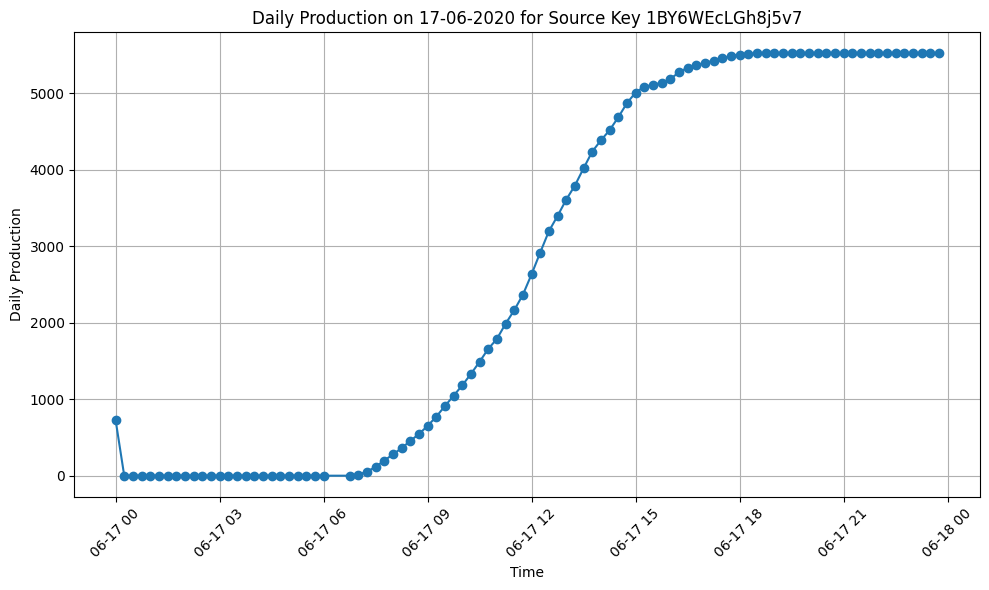

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'], Plant1_1BY6WEcLGh8j5v7_1706['DAILY_YIELD'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Daily Production')
plt.title('Daily Production on 17-06-2020 for Source Key 1BY6WEcLGh8j5v7')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# JOIN DATASETS

In [97]:
Plant_1_Generation_Data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [98]:
Plant_1_Weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [99]:
Plant_1_Generation_Data['DATE_TIME'] = pd.to_datetime(Plant_1_Generation_Data['DATE_TIME'], format='%d-%m-%Y %H:%M')
Plant_1_Weather['DATE_TIME'] = pd.to_datetime(Plant_1_Weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


Plant_1= pd.merge(Plant_1_Generation_Data, Plant_1_Weather, on=['DATE_TIME'], how='inner')


In [100]:
Plant_1 = Plant_1.drop(columns=['PLANT_ID_x', 'PLANT_ID_y', 'SOURCE_KEY_y'])

In [101]:
Plant_1

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


# model

In [102]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [103]:
Plant_1 = pd.get_dummies(Plant_1, columns=['SOURCE_KEY_x'])
Plant_1 = Plant_1.applymap(lambda x: 1 if x is True else 0 if x is False else x)
Plant_1

C:\Users\loris\AppData\Local\Temp\ipykernel_2624\864571119.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Plant_1 = Plant_1.applymap(lambda x: 1 if x is True else 0 if x is False else x)


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_x_1BY6WEcLGh8j5v7,SOURCE_KEY_x_1IF53ai7Xc0U56Y,...,SOURCE_KEY_x_iCRJl6heRkivqQ3,SOURCE_KEY_x_ih0vzX44oOqAx2f,SOURCE_KEY_x_pkci93gMrogZuBj,SOURCE_KEY_x_rGa61gmuvPhdLxV,SOURCE_KEY_x_sjndEbLyjtCKgGv,SOURCE_KEY_x_uHbuxQJl8lW7ozc,SOURCE_KEY_x_wCURE6d3bPkepu2,SOURCE_KEY_x_z9Y9gH1T5YWrNuG,SOURCE_KEY_x_zBIq5rxdHJRwDNY,SOURCE_KEY_x_zVJPv84UY57bAof
0,2020-05-15 00:00:00,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-05-15 00:00:00,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-05-15 00:00:00,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-05-15 00:00:00,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-05-15 00:00:00,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
68770,2020-06-17 23:45:00,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
68771,2020-06-17 23:45:00,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
68772,2020-06-17 23:45:00,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
Plant_1['DATE_TIME'] = pd.to_datetime(Plant_1['DATE_TIME'])
Plant_1['DATE_TIME'] = Plant_1['DATE_TIME'].apply(lambda x: x.timestamp())

In [105]:
X = Plant_1.drop(columns=['TOTAL_YIELD'])
y = Plant_1['TOTAL_YIELD']

In [106]:
model = LinearRegression()

# Inizializza la cross-validation KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1)



# Calcola il coefficiente di determinazione (R²) utilizzando le previsioni della cross-validation
r2_cv = r2_score(y, y_pred_cv)

print(f'R^2 Score from Cross-Validation: {r2_cv}')

NameError: name 'y_pred_cv' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Inizializza il modello di regressione
model = LinearRegression()

# Inizializza la cross-validation KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Esegui la cross-validation sul training set
cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

# Calcola la media e la deviazione standard dell'errore quadratico medio (MSE) della cross-validation
cv_mse_scores = -cv_scores
mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

# Allena il modello sul training set completo
model.fit(X_train, y_train)

# Valuta il modello sul test set
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

# Esegui la cross-validation per ottenere le previsioni su tutto il dataset
y_pred_cv = cross_val_predict(model, X, y, cv=kf)
# Calcola il coefficiente di determinazione (R²) utilizzando le previsioni della cross-validation
r2_cv = r2_score(y, y_pred_cv)

print(f'R^2 Score from Cross-Validation: {r2_cv}')
print(f'Mean CV MSE: {mean_cv_mse}')
print(f'Standard Deviation of CV MSE: {std_cv_mse}')
print(f'Test MSE: {test_mse}')


R^2 Score from Cross-Validation: 0.9999579731262246
Mean CV MSE: 7377235.602322315
Standard Deviation of CV MSE: 219666.89061675174
Test MSE: 6913123.672772179
